## Delivery Time Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as smf

In [2]:
delivery_time=pd.read_csv("delivery_time.csv")

In [3]:
delivery_time.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


## EDA & data visualization

In [4]:
delivery_time.shape

(21, 2)

In [5]:
delivery_time.isnull().sum()

Delivery Time    0
Sorting Time     0
dtype: int64

In [6]:
delivery_time.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [7]:
delivery_time.describe()

,Delivery Time,Sorting Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


In [8]:
delivery_time = delivery_time.rename({'Delivery Time':'Delivery_Time'},axis=1)
delivery_time = delivery_time.rename({'Sorting Time':'Sorting_Time'},axis=1)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Delivery_Time', ylabel='Density'>

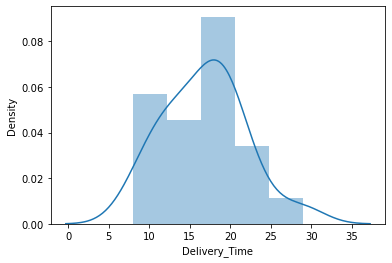

In [9]:
sns.distplot(delivery_time['Delivery_Time'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Sorting_Time', ylabel='Density'>

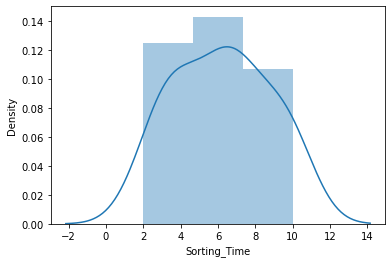

In [10]:
sns.distplot(delivery_time['Sorting_Time'])

{'whiskers': [<matplotlib.lines.Line2D at 0xad4a4ef280>,
 'caps': [<matplotlib.lines.Line2D at 0xad4a4ef940>,
 'boxes': [<matplotlib.lines.Line2D at 0xad4a4deee0>,
 'medians': [<matplotlib.lines.Line2D at 0xad4a4fd040>,
 'fliers': [<matplotlib.lines.Line2D at 0xad4a4fd3a0>,
 'means': []}

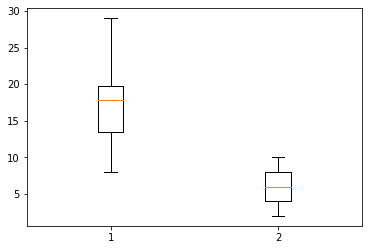

In [11]:
plt.boxplot(delivery_time)

## Correlation analysis

In [12]:
delivery_time.corr()

,Delivery_Time,Sorting_Time
Delivery_Time,1.000000,0.825997
Sorting_Time,0.825997,1.000000


<AxesSubplot:xlabel='Sorting_Time', ylabel='Delivery_Time'>

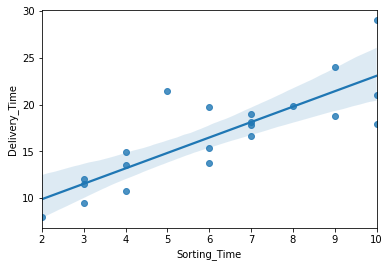

In [13]:
sns.regplot(x=delivery_time['Sorting_Time'],y=delivery_time['Delivery_Time'])

## Model building

In [14]:
model=smf.ols("Delivery_Time~Sorting_Time",data=delivery_time).fit()

In [15]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Delivery_Time   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Mon, 23 May 2022   Prob (F-statistic):           3.98e-06
Time:                        13:12:26   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        6.5827      1.722      3.823      0.001       2.979      10.186
Sorting_Time     1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [16]:
model.params

Intercept       6.582734
Sorting_Time    1.649020
dtype: float64

In [17]:
model.tvalues , model.pvalues

(Intercept       3.823349
 Sorting_Time    6.387447
 dtype: float64,
 Intercept       0.001147
 Sorting_Time    0.000004
 dtype: float64)

In [18]:
model.rsquared , model.rsquared_adj

(0.6822714748417231, 0.6655489208860244)

## Model Prediction

In [19]:
new_data=pd.Series([6,8])

In [20]:
new_data

0    6
1    8
dtype: int64

In [21]:
pred=pd.DataFrame(new_data,columns=['Sorting_Time'])
pred

,Sorting_Time
0,6
1,8


In [22]:
model.predict(pred)

0    16.476853
1    19.774893
dtype: float64

## log transformation

In [24]:
model2 = smf.ols('Delivery_Time~np.log(Sorting_Time)',data=delivery_time).fit()

In [25]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Delivery_Time   R-squared:                       0.695
Model:                            OLS   Adj. R-squared:                  0.679
Method:                 Least Squares   F-statistic:                     43.39
Date:                Mon, 23 May 2022   Prob (F-statistic):           2.64e-06
Time:                        13:16:29   Log-Likelihood:                -50.912
No. Observations:                  21   AIC:                             105.8
Df Residuals:                      19   BIC:                             107.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                1.1597      2.455      0.472      0.642      -3.978       6.297
np.log(Sorting_Time)     9.0434      1.373      6.587      0.000       6.170      11.917
==============================================================================
Omnibus:                        5.552   Durbin-Watson:                   1.427
Prob(Omnibus):                  0.062   Jarque-Bera (JB):                3.481
Skew:                           0.946   Prob(JB):                        0.175
Kurtosis:                       3.628   Cond. No.                         9.08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [26]:
model2.params

Intercept               1.159684
np.log(Sorting_Time)    9.043413
dtype: float64

In [27]:
model2.rsquared , model2.rsquared_adj

(0.6954434611324223, 0.6794141696130761)

In [28]:
pred2=pd.DataFrame(new_data,columns=['Sorting_Time'])
pred2

,Sorting_Time
0,6
1,8


In [29]:
model2.predict(pred2)

0    17.363305
1    19.964933
dtype: float64

## Exponential transformation

In [30]:
model3 = smf.ols('np.log(Delivery_Time)~Sorting_Time',data=delivery_time).fit()

In [31]:
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     np.log(Delivery_Time)   R-squared:                       0.711
Model:                               OLS   Adj. R-squared:                  0.696
Method:                    Least Squares   F-statistic:                     46.73
Date:                   Mon, 23 May 2022   Prob (F-statistic):           1.59e-06
Time:                           13:23:21   Log-Likelihood:                 7.7920
No. Observations:                     21   AIC:                            -11.58
Df Residuals:                         19   BIC:                            -9.495
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        2.1214      0.103     20.601      0.000       1.906       2.337
Sorting_Time     0.1056      0.015      6.836      0.000       0.073       0.138
==============================================================================
Omnibus:                        1.238   Durbin-Watson:                   1.325
Prob(Omnibus):                  0.538   Jarque-Bera (JB):                0.544
Skew:                           0.393   Prob(JB):                        0.762
Kurtosis:                       3.067   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [32]:
model3.params

Intercept       2.121372
Sorting_Time    0.105552
dtype: float64

In [33]:
model3.rsquared , model3.rsquared_adj

(0.7109478980584187, 0.6957346295351776)

In [34]:
pred3=pd.DataFrame(new_data,columns=['Sorting_Time'])
pred3

,Sorting_Time
0,6
1,8


In [35]:
model3.predict(pred3)

0    2.754681
1    2.965785
dtype: float64

## Quadratic model

In [38]:
delivery_time["sorting_Time_sq"] =delivery_time.Sorting_Time*delivery_time.Sorting_Time

In [42]:
    model4 = smf.ols("Delivery_Time~Sorting_Time+sorting_Time_sq",data=delivery_time).fit()

In [43]:
model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Delivery_Time   R-squared:                       0.693
Model:                            OLS   Adj. R-squared:                  0.659
Method:                 Least Squares   F-statistic:                     20.36
Date:                Mon, 23 May 2022   Prob (F-statistic):           2.39e-05
Time:                        13:34:29   Log-Likelihood:                -50.981
No. Observations:                  21   AIC:                             108.0
Df Residuals:                      18   BIC:                             111.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           3.5222      4.160      0.847      0.408      -5.217      12.261
Sorting_Time        2.8130      1.461      1.926      0.070      -0.256       5.882
sorting_Time_sq    -0.0932      0.115     -0.810      0.429      -0.335       0.149
==============================================================================
Omnibus:                        5.388   Durbin-Watson:                   1.345
Prob(Omnibus):                  0.068   Jarque-Bera (JB):                3.393
Skew:                           0.943   Prob(JB):                        0.183
Kurtosis:                       3.563   Cond. No.                         373.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [45]:
model4.params

Intercept          3.522234
Sorting_Time       2.813002
sorting_Time_sq   -0.093198
dtype: float64

In [46]:
model4.rsquared , model4.rsquared_adj

(0.6934396274520247, 0.659377363835583)

In [47]:
pred4=pd.DataFrame(new_data,columns=['Sorting_Time'])
pred4

,Sorting_Time
0,6
1,8


## Salary Data

In [49]:
salary_data=pd.read_csv('Salary_Data.csv')

In [50]:
salary_data.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


## EDA & Data visualization

In [51]:
salary_data.shape

(30, 2)

In [52]:
salary_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [53]:
salary_data.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [54]:
salary_data.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='YearsExperience', ylabel='Density'>

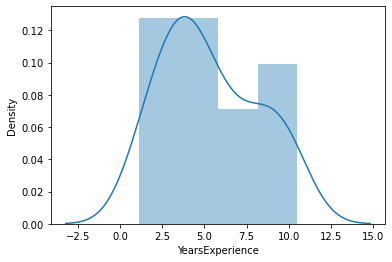

In [55]:
sns.distplot(salary_data['YearsExperience'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Salary', ylabel='Density'>

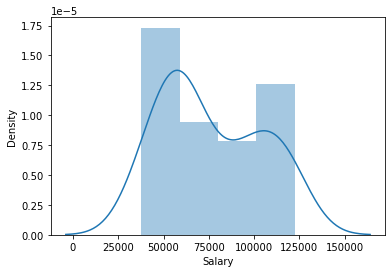

In [56]:
sns.distplot(salary_data['Salary'])

{'whiskers': [<matplotlib.lines.Line2D at 0xad3de787f0>,
 'caps': [<matplotlib.lines.Line2D at 0xad3de78eb0>,
 'boxes': [<matplotlib.lines.Line2D at 0xad3de78490>,
 'medians': [<matplotlib.lines.Line2D at 0xad3de845b0>,
 'fliers': [<matplotlib.lines.Line2D at 0xad3de84910>,
 'means': []}

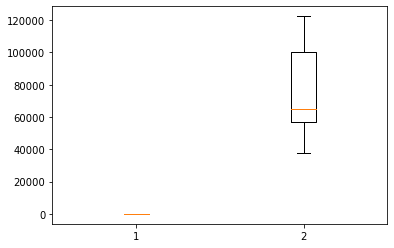

In [57]:
plt.boxplot(salary_data)

## Correlation analysis

In [58]:
salary_data.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


<AxesSubplot:xlabel='YearsExperience', ylabel='Salary'>

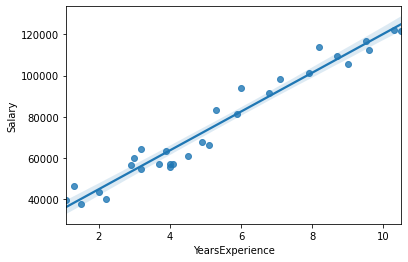

In [59]:
sns.regplot(x=salary_data['YearsExperience'],y=salary_data['Salary'])

## Model Building

In [60]:
model=smf.ols("Salary~YearsExperience",data=salary_data).fit()

In [61]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Mon, 23 May 2022   Prob (F-statistic):           1.14e-20
Time:                        13:38:58   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        2.579e+04   2273.053     11.347      0.000    2.11e+04    3.04e+04
YearsExperience  9449.9623    378.755     24.950      0.000    8674.119    1.02e+04
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [62]:
model.params

Intercept          25792.200199
YearsExperience     9449.962321
dtype: float64

In [63]:
model.tvalues , model.pvalues

(Intercept          11.346940
 YearsExperience    24.950094
 dtype: float64,
 Intercept          5.511950e-12
 YearsExperience    1.143068e-20
 dtype: float64)

In [64]:
model.rsquared , model.rsquared_adj

(0.9569566641435086, 0.9554194021486339)

## Model Prediction

In [65]:
new_data=pd.Series([4,7])
new_data

0    4
1    7
dtype: int64

In [66]:
pred=pd.DataFrame(new_data,columns=['YearsExperience'])
pred

,YearsExperience
0,4
1,7


In [67]:
model.predict(pred)

0    63592.049484
1    91941.936449
dtype: float64

## log transformation

In [68]:
model2 = smf.ols('Salary~np.log(YearsExperience)',data=salary_data).fit()

In [69]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.854
Model:                            OLS   Adj. R-squared:                  0.849
Method:                 Least Squares   F-statistic:                     163.6
Date:                Mon, 23 May 2022   Prob (F-statistic):           3.25e-13
Time:                        13:41:26   Log-Likelihood:                -319.77
No. Observations:                  30   AIC:                             643.5
Df Residuals:                      28   BIC:                             646.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                1.493e+04   5156.226      2.895      0.007    4365.921    2.55e+04
np.log(YearsExperience)  4.058e+04   3172.453     12.792      0.000    3.41e+04    4.71e+04
==============================================================================
Omnibus:                        1.094   Durbin-Watson:                   0.512
Prob(Omnibus):                  0.579   Jarque-Bera (JB):                0.908
Skew:                           0.156   Prob(JB):                        0.635
Kurtosis:                       2.207   Cond. No.                         5.76
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [70]:
model2.params

Intercept                  14927.97177
np.log(YearsExperience)    40581.98796
dtype: float64

In [71]:
model2.rsquared , model2.rsquared_adj

(0.8538888828756969, 0.8486706286926861)

In [72]:
pred2=pd.DataFrame(new_data,columns=['YearsExperience'])
pred2

,YearsExperience
0,4
1,7


In [73]:
model2.predict(pred2)

0    71186.552842
1    93896.874010
dtype: float64

## Exponential transformation

In [75]:
model3 = smf.ols('np.log(Salary)~YearsExperience',data=salary_data).fit()

In [76]:
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         np.log(Salary)   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.930
Method:                 Least Squares   F-statistic:                     383.6
Date:                Mon, 23 May 2022   Prob (F-statistic):           7.03e-18
Time:                        13:53:39   Log-Likelihood:                 28.183
No. Observations:                  30   AIC:                            -52.37
Df Residuals:                      28   BIC:                            -49.56
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          10.5074      0.038    273.327      0.000      10.429      10.586
YearsExperience     0.1255      0.006     19.585      0.000       0.112       0.139
==============================================================================
Omnibus:                        0.826   Durbin-Watson:                   1.438
Prob(Omnibus):                  0.661   Jarque-Bera (JB):                0.812
Skew:                           0.187   Prob(JB):                        0.666
Kurtosis:                       2.286   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [77]:
model3.params

Intercept          10.507402
YearsExperience     0.125453
dtype: float64

In [85]:
model3.rsquared,model3.rsquared_adj

(0.9319671194084195, 0.9295373736730059)

In [78]:
pred3=pd.DataFrame(new_data,columns=['YearsExperience'])
pred3

,YearsExperience
0,4
1,7


In [79]:
model3.predict(pred3)

0    11.009213
1    11.385572
dtype: float64

# Quadratic model

In [80]:
salary_data["YearsExperience_sq"] =salary_data.YearsExperience*salary_data.YearsExperience

In [82]:
model4 = smf.ols("Salary~YearsExperience+YearsExperience_sq",data=salary_data).fit()

In [84]:
model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.954
Method:                 Least Squares   F-statistic:                     300.3
Date:                Mon, 23 May 2022   Prob (F-statistic):           3.59e-19
Time:                        13:58:20   Log-Likelihood:                -301.43
No. Observations:                  30   AIC:                             608.9
Df Residuals:                      27   BIC:                             613.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept           2.621e+04   4554.674      5.756      0.000    1.69e+04    3.56e+04
YearsExperience     9259.2839   1811.007      5.113      0.000    5543.405     1.3e+04
YearsExperience_sq    16.3926    152.121      0.108      0.915    -295.734     328.520
==============================================================================
Omnibus:                        2.181   Durbin-Watson:                   1.649
Prob(Omnibus):                  0.336   Jarque-Bera (JB):                1.627
Skew:                           0.384   Prob(JB):                        0.443
Kurtosis:                       2.156   Cond. No.                         223.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [86]:
model3.params

Intercept          10.507402
YearsExperience     0.125453
dtype: float64

In [87]:
model4.rsquared,model4.rsquared_adj

(0.956975168321065, 0.953788143752255)

In [88]:
pred4=pd.DataFrame(new_data,columns=['YearsExperience'])
pred4

,YearsExperience
0,4
1,7
